<a href="https://colab.research.google.com/github/Rodz30/Complete-Python-3-Bootcamp/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd 
df=pd.read_csv('drive/My Drive/AL_WIND_07_12 (1)csvupdated.csv')
df.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Air temperature,Pressure,Wind speed,Wind direction,Power generated by system
0,10.926,0.979103,9.014,229,33688.1
1,9.919,0.979566,9.428,232,37261.9
2,8.567,0.979937,8.700,236,30502.9
3,7.877,0.980053,8.481,247,28419.2
4,7.259,0.979867,8.383,256,27370.3


In [0]:
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)==0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

In [0]:
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    

In [0]:
# Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()



To check pairwise joint distribution of numeric data


NameError: ignored

In [0]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    

In [0]:
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)k
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()

In [0]:
def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if len(df[df.isnull().any(axis=1)] != 0):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

In [0]:
 # EDA of categorical data
    categorical_eda(df)


To check: 
Unique count of non-numeric data

Series([], dtype: float64)



To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Air temperature,52560.0,15.531589,9.867689,-14.066000,8.180500,16.548000,23.001000,38.80500
Pressure,52560.0,0.981262,0.005393,0.958598,0.977896,0.980961,0.984702,1.00558
Wind speed,52560.0,5.944999,3.009099,0.140000,3.533000,5.678000,8.134000,19.72500
Wind direction,52560.0,181.286187,98.435074,0.000000,118.000000,181.000000,258.000000,360.00000
Power generated by system,52560.0,14743.922284,17254.684484,0.000000,0.000000,7286.300000,24537.000000,61245.40000


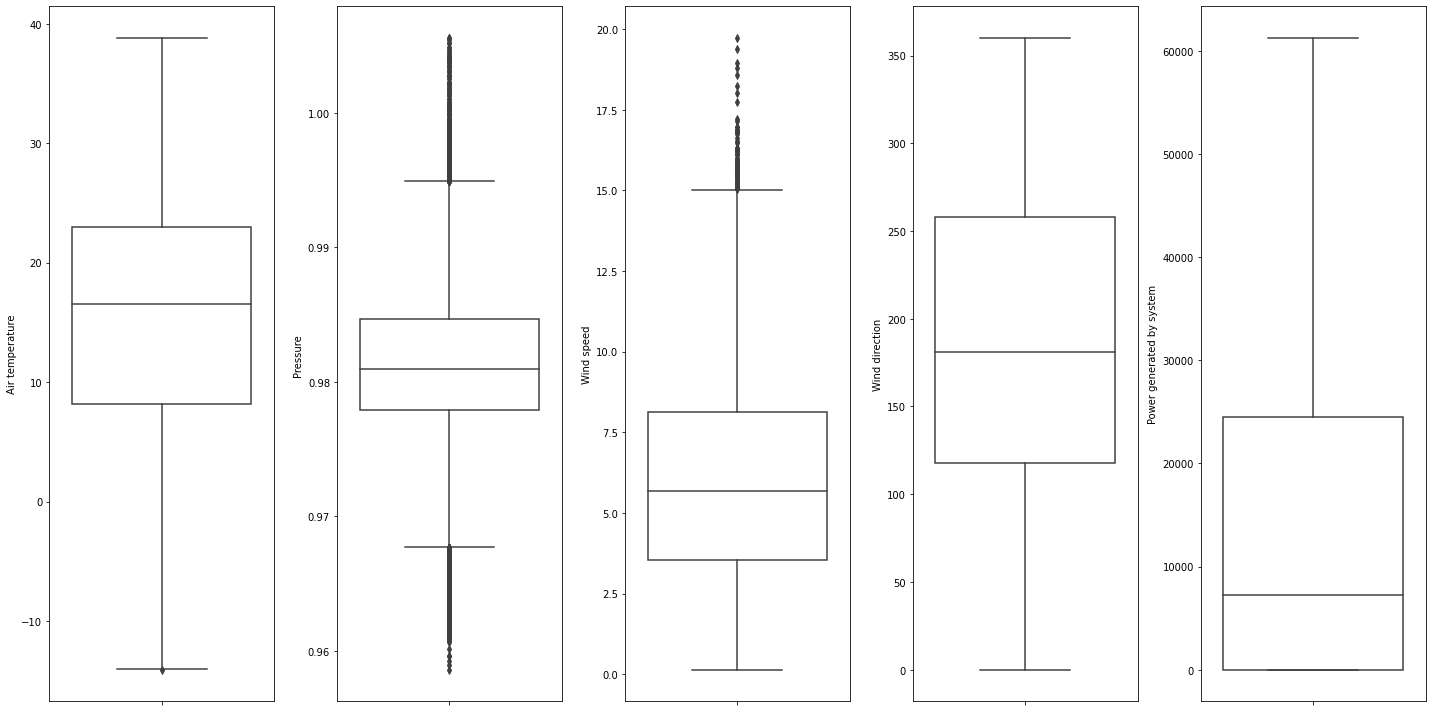

In [0]:
 # EDA of numeric data
    numeric_eda(df)

In [0]:
 # Plot time series plot of numeric data
    time_series_plot(df)

 


To check time series of numeric data  by daily, monthly and yearly frequency


In [0]:
eda(df)

Preview of data:


,Air temperature,Pressure,Wind speed,Wind direction,Power generated by system
0,10.926,0.979103,9.014,229,33688.1
1,9.919,0.979566,9.428,232,37261.9
2,8.567,0.979937,8.700,236,30502.9



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Air temperature            52560 non-null  float64
 1   Pressure                   52560 non-null  float64
 2   Wind speed                 52560 non-null  float64
 3   Wind direction             52560 non-null  int64  
 4   Power generated by system  52560 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.0 MB
None

***Number of duplicated entries:  8760


,Air temperature,Pressure,Wind speed,Wind direction,Power generated by system
36060,-7.306,0.995581,5.169,343,5357.22
44820,-7.306,0.995581,5.169,343,5357.22
36059,-7.095,0.995517,6.638,352,13966.70
44819,-7.095,0.995517,6.638,352,13966.70
35100,-6.890,0.995736,5.818,338,8639.31


In [0]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:", duplicate_rows_df.shape)

number of duplicate rows: (8760, 5)


In [0]:
df.count()

Air temperature              52560
Pressure                     52560
Wind speed                   52560
Wind direction               52560
Power generated by system    52560
dtype: int64

In [0]:
# Finding the null values.
print(df.isnull().sum())

Air temperature              0
Pressure                     0
Wind speed                   0
Wind direction               0
Power generated by system    0
dtype: int64


In [0]:
# Dropping the missing values.
df = df.dropna() 
df.count()

Air temperature              52560
Pressure                     52560
Wind speed                   52560
Wind direction               52560
Power generated by system    52560
dtype: int64

In [0]:
# After dropping the values
print(df.isnull().sum())

Air temperature              0
Pressure                     0
Wind speed                   0
Wind direction               0
Power generated by system    0
dtype: int64


In [3]:
!pip install pyod
!pip install --upgrade pyod  # to make sure that the latest version is installed!

     |████████████████████████████████| 102kB 2.7MB/s 
     |████████████████████████████████| 2.1MB 9.8MB/s 
  Created wheel for pyod: filename=pyod-0.7.8.2-cp36-none-any.whl size=104997 sha256=389b90efab558af67457d8ec1602f73903da49e1e5ac09e94421ac1c487802eb
  Stored in directory: /root/.cache/pip/wheels/28/38/ec/0ecbcd67faeb595ac0dbd9b5f85d5c5bdcb4573819e65240fe
  Created wheel for combo: filename=combo-0.1.0-cp36-none-any.whl size=42043 sha256=17639e93aa2a6a56ae78bcb84ee87f68e298fece276f87f452c686339cf54422
  Stored in directory: /root/.cache/pip/wheels/00/fd/6c/8da495ef08ce61844a646df2423c2b8ecda377a89c90ecd88e
  Created wheel for suod: filename=suod-0.0.3-cp36-none-any.whl size=2166457 sha256=1d1508164fee931644590f0e43225f00b71175a362ed3bcc2d67c73aad2d9a5a
  Stored in directory: /root/.cache/pip/wheels/15/56/16/6944851600a62d859c89cd11df1adecbe0b6a02f7ad713d4dd
Successfully built pyod combo suod
Requirement already up-to-date: pyod in /usr/local/lib/python3.6/dist-packages (0.7.8.

In [0]:
from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF
from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
from pyod.models.lof import LOF
# reading the  training data

df=pd.read_csv('drive/My Drive/AL_WIND_07_12FINAL.csv')

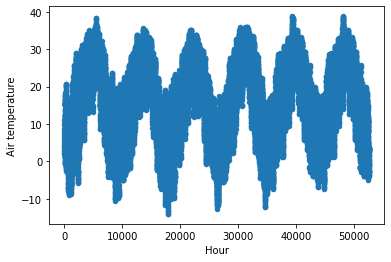

In [12]:
df.plot.scatter('Hour','Air temperature')

In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[['Wind speed','Power generated by system']] = scaler.fit_transform(df[['Wind speed','Power generated by system']])
df[['Wind speed','Power generated by system']].head()

,Wind speed,Power generated by system
0,0.453102,0.550051
1,0.474240,0.608403
2,0.437069,0.498044
3,0.425887,0.464022
4,0.420883,0.446896


In [0]:
X1 = df['Wind speed'].values.reshape(-1,1)
X2 = df['Power generated by system'].values.reshape(-1,1)

X = np.concatenate((X1,X2),axis=1)

In [0]:
random_state = np.random.RandomState(42)
outliers_fraction = 0.05
# Define seven outlier detection tools to be compared
classifiers = {
        'Angle-based Outlier Detector (ABOD)': ABOD(contamination=outliers_fraction),
        'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=random_state),
        'Feature Bagging':FeatureBagging(LOF(n_neighbors=35),contamination=outliers_fraction,check_estimator=False,random_state=random_state),
        'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outliers_fraction),
        'Isolation Forest': IForest(contamination=outliers_fraction,random_state=random_state),
        'K Nearest Neighbors (KNN)': KNN(contamination=outliers_fraction),
        'Average KNN': KNN(method='mean',contamination=outliers_fraction)
}

OUTLIERS :  0 INLIERS :  52560 Angle-based Outlier Detector (ABOD)


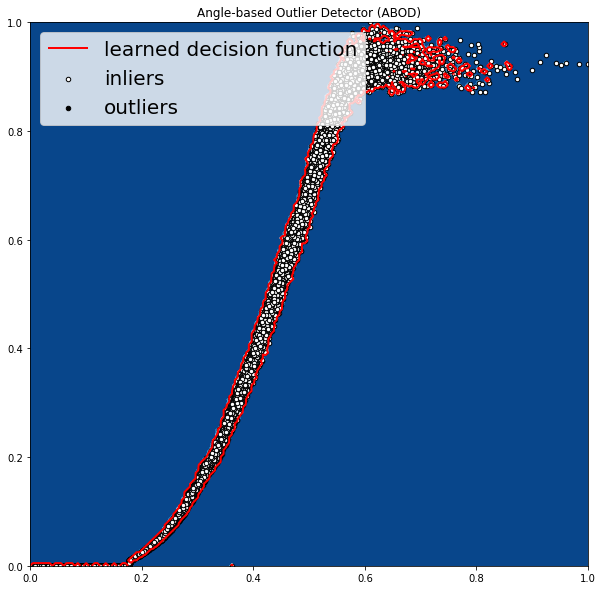

OUTLIERS :  2628 INLIERS :  49932 Cluster-based Local Outlier Factor (CBLOF)


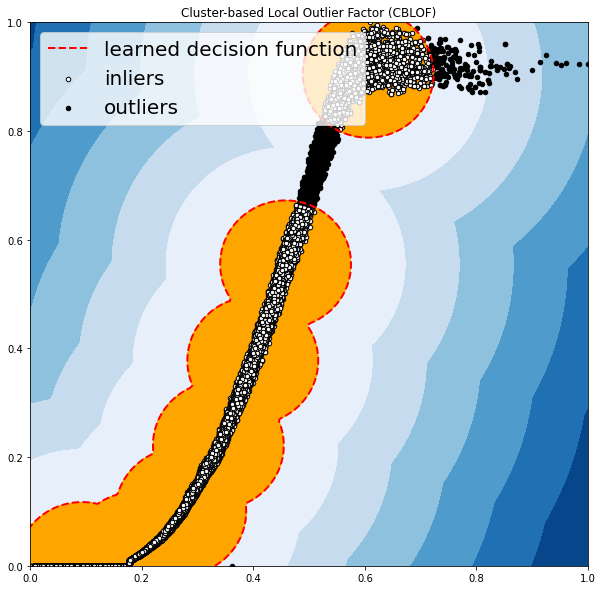

OUTLIERS :  2296 INLIERS :  50264 Feature Bagging


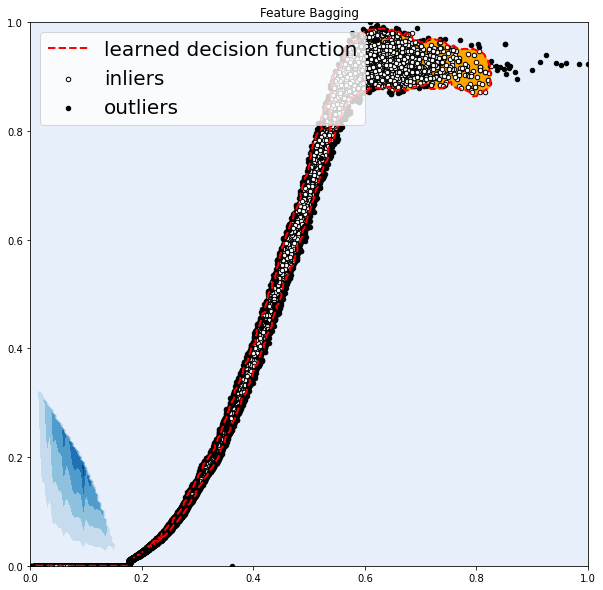

OUTLIERS :  1507 INLIERS :  51053 Histogram-base Outlier Detection (HBOS)


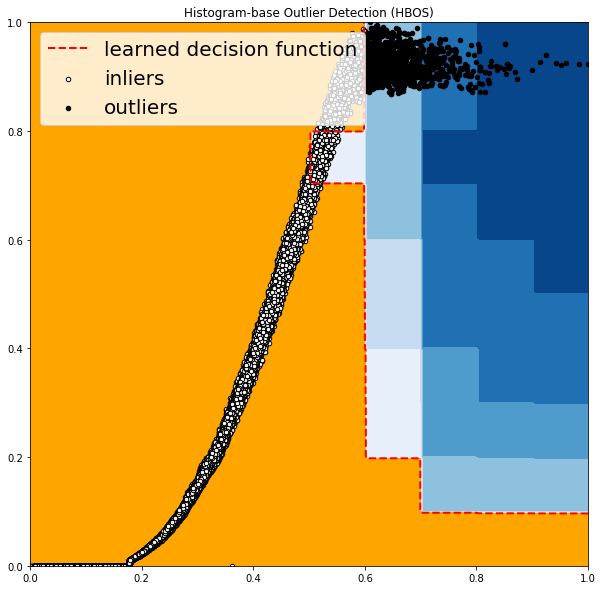

OUTLIERS :  2628 INLIERS :  49932 Isolation Forest


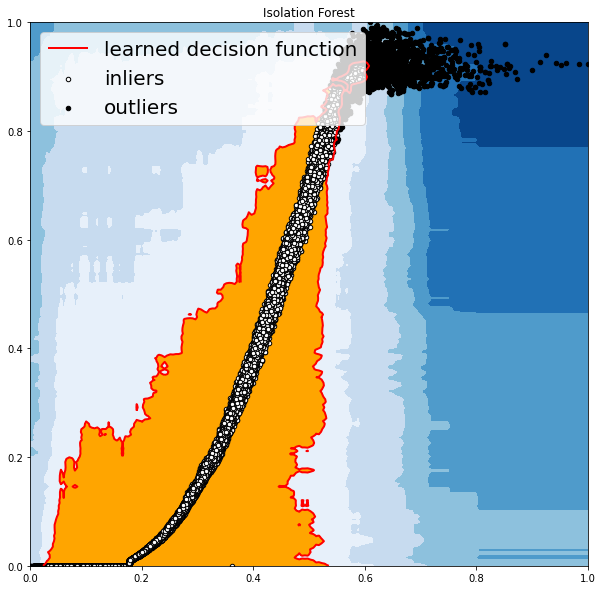

OUTLIERS :  2127 INLIERS :  50433 K Nearest Neighbors (KNN)


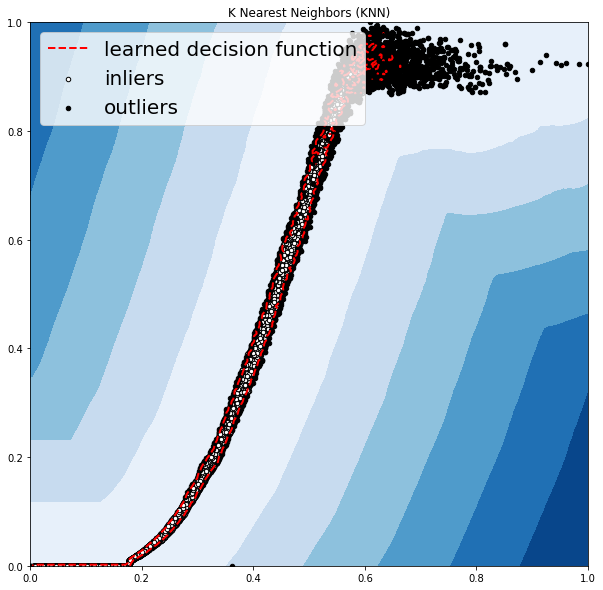

OUTLIERS :  1340 INLIERS :  51220 Average KNN


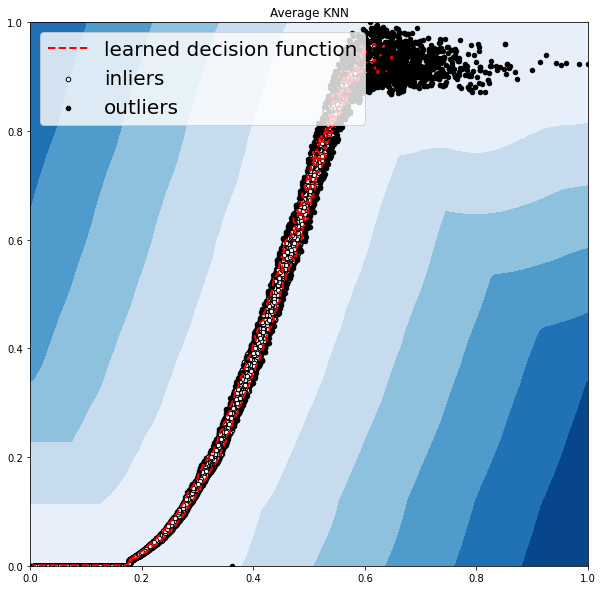

In [0]:
xx , yy = np.meshgrid(np.linspace(0,1 , 200), np.linspace(0, 1, 200))
from scipy import stats

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)
    # predict raw anomaly score
    scores_pred = clf.decision_function(X) * -1
        
    # prediction of a datapoint category outlier or inlier
    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)
    plt.figure(figsize=(10, 10))
    
    # copy of dataframe
    dfx = df
    dfx['outlier'] = y_pred.tolist()
    
    # IX1 - inlier feature 1,  IX2 - inlier feature 2
    IX1 =  np.array(dfx['Wind speed'][dfx['outlier'] == 0]).reshape(-1,1)
    IX2 =  np.array(dfx['Power generated by system'][dfx['outlier'] == 0]).reshape(-1,1)
    
    # OX1 - outlier feature 1, OX2 - outlier feature 2
    OX1 =  dfx['Wind speed'][dfx['outlier'] == 1].values.reshape(-1,1)
    OX2 =  dfx['Power generated by system'][dfx['outlier'] == 1].values.reshape(-1,1)
         
    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)
        
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 * outliers_fraction)
        
    # decision function calculates the raw anomaly score for every point
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
    Z = Z.reshape(xx.shape)
          
    # fill blue map colormap from minimum anomaly score to threshold value
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
        
    # draw red contour line where anomaly score is equal to thresold
    a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
        
    # fill orange contour lines where range of anomaly score is from threshold to maximum anomaly score
    plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
        
    b = plt.scatter(IX1,IX2, c='white',s=20, edgecolor='k')
    
    c = plt.scatter(OX1,OX2, c='black',s=20, edgecolor='k')
       
    plt.axis('tight')  
    
    # loc=2 is used for the top left corner 
    plt.legend(
        [a.collections[0], b,c],
        ['learned decision function', 'inliers','outliers'],
        prop=matplotlib.font_manager.FontProperties(size=20),
        loc=2)
      
    plt.xlim((0, 1))
    plt.ylim((0, 1))
    plt.title(clf_name)
    plt.show()